<img src = 'imagens/Logo do Projeto 3 .png' >

#  <span style = "font-family:Times New Roman"> <font color = #045cbc> Objetivo 
    
<br>
    
- Apresentar algumas informações referentes à Data Science e Análise de Dados
<br>
    
- Comentários algumas ferramentas como Excel, R, Power BI     
<br>
    
- Quais são as possibilidades da ferramenta 
   <br>
    
- Fazer uma análise do câmbio do Rublo e Grívnia e da pauta de exportações da Ucrânia
   <br>
- Fazer Processo Seletivo     

## <span style = "font-family:Times New Roman"> <font color = #045cbc> Análise de Dados 

De acordo com o [**Wikipedia**](https://pt.wikipedia.org/wiki/An%C3%A1lise_de_dados) a análise de dados "é um processo de inspeção, limpeza, transformação e modelagem de dados **com o objetivo de descobrir informações úteis**, informar conclusões e apoiar a tomada de decisões".

Este processo de analise de dados é bastante comum em diversas áreas dentre elas temos a área da saúde, mercado financeiro, empresas de consultoria, a própria academia  entre várias outras.

Mas o que é um <font color = #045cbc>**"dado"** <font color = black>?
    
De acordo com [Valdemar Setzer](https://www.ime.usp.br/~vwsetzer/datagrama.html#Autor), professor do departamento de ciência da computação da USP, dado é <i>**"uma seqüência de símbolos quantificados ou quantificáveis"**</i>. Isso pode incluir uma vasta gama de conteúdos, que podem ser de ordem geográfica, temporal, sonora, tabular, textual, visual etc. 

<img src = 'imagens/tipos de dados/geograficos.png' > <br> Fonte : [**Geopandas**](https://geopandas.org/en/stable/docs/user_guide/data_structures.html)

<img src = 'imagens/tipos de dados/série de tempo.png' >

### <span style = "font-family:Times New Roman"> <font color = #045cbc> Algumas Ferramentas Disponíveis 

<img src = 'imagens/Algumas Ferramentas para Análise.png' width = 720 >

Existem uma série de ferramentas disponíveis para análise de dados. Nesta apresentação vamos comentar algumas famosas. 

<img src = 'imagens/ferramentas/2.png' >

<img src = 'imagens/ferramentas/3.png' >

Fonte: [**Microsoft**](https://docs.microsoft.com/pt-br/power-bi/admin/service-admin-manage-your-data-storage-in-power-bi)

<img src = 'imagens/ferramentas/4.png' >

<img src = 'imagens/ferramentas/5.png' >

<br>

# <span style = "font-family:Times New Roman"> <font color = #045cbc> Guerra da Ucrânia 
    
<br>

- Contextualizar o que é, como começou, impactos sociais e econômicos 

<br>

# <span style = "font-family:Times New Roman"> <font color = #045cbc> Análise Cambial
    
<br>



<br>

- Buscar referências de autores/artigos que escreveram sobre este tema ; 
- Tratar uma análise breve do câmbio 



<br>

## <span style = "font-family:Times New Roman"> <font color = #045cbc>Rublo Russo 
    
<br>


Para começarmos, irei importar as bibliotecas necessárias para a analise lê-las

In [1]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from dateutil.relativedelta import relativedelta
import datetime
import plotly.express as px

In [2]:
rublo_e_dolar = pd.read_csv('./dados/USD_RUB.csv') 

Agora, para mais fácil entendimento alterei os nomes das variáveis para que o código rode, e verificar se estão corretos
e traduzir as variáveis para português.

In [3]:
rublo_e_dolar.rename(columns={'Price': 'Último', 'Date': 'Data','High': 'Máxima',
                            'Low': 'Miníma', 'Change%': 'Var%', 'Open': 'Abertura',}, inplace=True)

In [4]:
rublo_e_dolar

,Data,Último,Abertura,Máxima,Mínima,Var%
0,Jul 22,"55,0200","51,4500","64,5988","51,3998","6,94%"
1,Jun 22,"51,4500","61,5000","62,4923","50,1006","-16,34%"
2,Mai 22,"61,5000","70,9600","70,9600","55,8383","-13,33%"
3,Abr 22,"70,9600","83,2000","84,9917","70,3221","-14,71%"
4,Mar 22,"83,2000","94,6025","121,2100","82,9525","-12,05%"
...,...,...,...,...,...,...
86,Mai 15,"52,3212","51,6513","52,1965","50,3630","1,30%"
87,Abr 15,"51,6513","58,1993","58,4863","49,4550","-11,25%"
88,Mar 15,"58,1993","61,6207","63,0344","56,2019","-5,55%"
89,Fev 15,"61,6207","68,8629","70,4525","59,8819","-10,52%"


Para esta análise, só utilizei as variáveis 'Data' e 'Último' (Preço de fechamento), e agora usarei um comando que faça essas variáveis serem lidas, e após isso irei retirar todos os dados em branco que possam existir. 

In [5]:
rublo_e_dolar = rublo_e_dolar[['Data', 'Último']]

In [6]:
rublo_e_dolar = rublo_e_dolar.dropna()

Agora, irei ajustar a data em ordem crescente pois o arquivo está com as datas ao contrário e também ajustar o índex.

In [7]:
data_correta = rublo_e_dolar.iloc[::-1]

In [8]:
data_correta.reset_index(drop = True, inplace = True)

In [19]:
data_correta

,Data,Último,datetime
0,Jan 15,"68,8629",2015-01-01
1,Fev 15,"61,6207",2015-02-01
2,Mar 15,"58,1993",2015-03-01
3,Abr 15,"51,6513",2015-04-01
4,Mai 15,"52,3212",2015-05-01
...,...,...,...
86,Mar 22,"83,2000",2022-03-01
87,Abr 22,"70,9600",2022-04-01
88,Mai 22,"61,5000",2022-05-01
89,Jun 22,"51,4500",2022-06-01


Precisarei transformar a variável ''Data'' em datetime, sendo o módulo datetime responsável por fornecer as classes para manipulação de datas e horas. Assim sendo possivél organizar pela data correta. Também irei colocar a data como índice. 

In [9]:
inicio_date = datetime.date(2015, 1, 1)
fim_date = datetime.date(2022, 7, 1)
delta = relativedelta(months=1)
datas = []
while (inicio_date <= fim_date):
    datas.append(inicio_date)
    inicio_date += delta
for registro in range(len(data_correta)):
    data_correta.loc[registro, 'datetime'] = datas[registro]

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1599: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [10]:
rublo3 = data_correta.set_index('datetime')

In [11]:
rublo3 = data_correta.drop(columns=['Data'])

In [12]:
rublo3.set_index('datetime', inplace=True)

In [13]:
rublo3['Último'] = rublo3['Último'].str.replace(',','.').astype(float)

Colocando a Data como índice, assim podemos manipular o preço através dos anos escolhidos.

In [21]:
fig = px.line(data_correta, x = 'datetime', y = 'Último', title='Quanto 1 Dólar Americano compra do Rublo Russo')
fig.show()

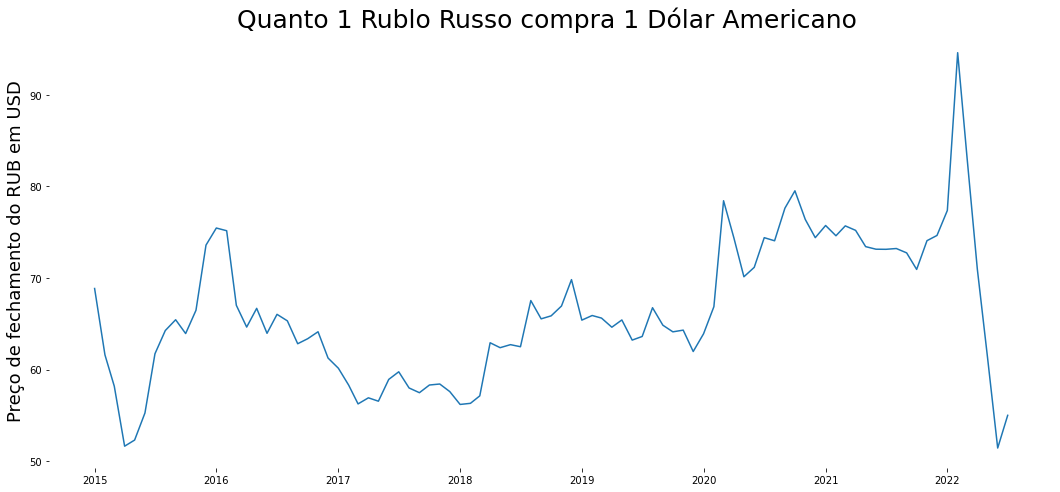

In [24]:
plt.figure(figsize=(18, 8)) 
  
plt.plot(rublo3) 


plt.title('Quanto 1 Rublo Russo compra 1 Dólar Americano ', fontsize=25)
plt.ylabel('Preço de fechamento do RUB em USD', fontsize=18)



for pos in ['right', 'top', 'bottom', 'left']: 
    plt.gca().spines[pos].set_visible(False) 
plt.show()


<br>

## <span style = "font-family:Times New Roman"> <font color = #045cbc> Grynia Ucraniana
    
<br>

Na analise da ucrânia, irei utilizar os mesmos passos da Rússia, ler os dados e importar as bibliotecas necessárias

In [ ]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from dateutil.relativedelta import relativedelta
import datetime

In [ ]:
grynia_e_dolar = pd.read_csv(r'dados/ukr.csv')

Neste arquivo também foi preciso traduzir as variáveis e igualmente acima, irei checar os dados como de costume,

In [ ]:
grynia_e_dolar.rename(columns={'Price': 'Último', 'Date': 'Data','High': 'Máxima',
                            'Low': 'Miníma', 'Change%': 'Var%', 'Open': 'Abertura',}, 
                    
                    inplace=True)

In [ ]:
grynia_e_dolar

Por fins lógicos, usarei as mesmas váriaveis "Data" e "Ùltimo" para poder fazer a analíse igualmente e retirar todos os dados em branco que o arquivo possa conter.

In [ ]:
grynia_e_dolar = grynia_e_dolar[['Data', 'Último']]

In [ ]:
grynia_e_dolar = grynia_e_dolar.dropna()

Feito isto, o index será ajustado e a data vai ser colocada em ordem crescente, pois os dois arquivos vieram do mesmo site.

In [ ]:
analise_correta_df = grynia_e_dolar.iloc[::-1]

In [ ]:
analise_correta_df.reset_index(drop = True, inplace = True)

Transformando os dados em Datetime assim possível organizar as datas pela data correta.

In [ ]:
inicio_date = datetime.date(2015, 1, 1)
fim_date = datetime.date(2022, 7, 1)

delta = relativedelta(months=1)
datas = []

while (inicio_date <= fim_date):
    datas.append(inicio_date)
    inicio_date += delta

In [ ]:
for registro in range(len(analise_correta_df)):
    analise_correta_df.loc[registro, 'datetime'] = datas[registro]

Colocarei a Data como índice, assim podemos manipular o preço através dos anos escolhidos e após todo o tratamento, podemos ver
o resultado graficamente

In [ ]:
grynia3 = analise_correta_df.set_index('datetime')


In [ ]:
grynia3 = analise_correta_df.drop(columns=['Data'])

In [ ]:
grynia3.set_index('datetime', inplace=True)

In [ ]:
grynia3['Último'] = grynia3['Último'].str.replace(',','.').astype(float)

In [ ]:
plt.figure(figsize=(18, 8)) 
  
plt.plot(grynia3) 

plt.title('Quanto 1 Dólar Americano compra da Hryvinia Ucraniana ', fontsize=25)

for eixo in ['right', 'top', 'bottom', 'left']: 
    plt.gca().spines[eixo].set_visible(False) 
plt.show()


<br>

<br>

# <span style = "font-family:Times New Roman"> <font color = #045cbc> Análise de Exportações 
    
<br>
 
<br>
    

<br>

- Buscar referências de autores/artigos que escreveram sobre este tema ; 
- Tratar uma análise breve das exportações ; 
- Perguntar para o Fernando sobre a biblioteca que realiza animação de mudança de variáveis ao longo do tempo. 

<br>


O projeto procura comparar a correlação de Taxa de Câmbio com as Exportações da Russia no seu período de Guerra (Janeiro de 2022) e também olhar esse comportamento durante o tempo. 

<br>

### <span style = "font-family:Times New Roman"> <font color = #045cbc> Fonte dos Dados
    
<br>

The [**Observatory of Economic Complexity**](<https://oec.world/en/profile/country/rus#:~:text=Yearly%20Exports,-%23permalink%20to%20section&text=In%202020%2C%20Russia%20exported%20a,to%20%24330B%20in%202020>) (OEC) - Plataforma Especializada em dados de trocas comerciais (importações, exportações e taxas de câmbio).  Também possuem blogs e pesquisas todas voltadas para a área da Economia.

<br>
    
    

In [ ]:
import pandas as pd

In [ ]:
export = pd.read_csv('dados/Products-Exports-Jan-2022----Click-to-Select-a-Product.csv')

In [ ]:
export.columns

In [ ]:
export.head()


<br>

Harmonized Sistem (HS) - são códigos de produtos os quais podem ser lidos em qualquer parte do mundo, para identificação de produtos.

<br>


In [ ]:
# Calculando o valor negociado total das seções

sections_tv = export.groupby('Section')[['Trade Value']].sum()
sections_tv.sort_values(by = 'Trade Value' , ascending = False)

## <font color = red > Fazer Bar Plot com as Exportações por Seção

In [ ]:
[export['Section'] == "Mineral Products" ] 

In [ ]:
# Verificando o produto com a maior taxa de exportação na seção de Produtos Minerais 

mineral_products_filter = export['Section'] == "Mineral Products" 
mineral_products = export[mineral_products_filter]

In [ ]:
# Selecionando o produto com maior valor de troca da seção 

product = mineral_products[mineral_products['Trade Value'] == mineral_products['Trade Value'].max()]['HS4']
product.values[0]


<br>

## <span style = "font-family:Times New Roman"> <font color = #045cbc> Processo Seletivo 
    
<br>



<br>

## <span style = "font-family:Times New Roman"> <font color = #045cbc> Referências 
    
<br>
    
    


<br>

## <span style = "font-family:Times New Roman"> <font color = #045cbc> Desenvolvedores do Projeto 
    
<br>